In this notebook, we inject foregrounds that are described by two polynomial terms, but try to fit for four polynomial terms. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import corner
sys.path.append(os.path.abspath('../src/'))
import global_signal_black_holes_mcmc as GSBH_MCMC
import global_signal_black_holes as GSBH
#import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

First I initialize a sampler, plot the data, and perform sampling.

{'NU0': 72.69631823015025, 'TAU': 3.3454769725200135, 'A': 0.8944951431830416, 'W': 36.74181368050914, 'NPOLY': 5, 'APOLY0': 1857.9806819684213, 'APOLY1': -217.80307838003222, 'APOLY2': 333.9100668507074, 'APOLY3': -241.80819691226395, 'APOLY4': 63.11075486812174}


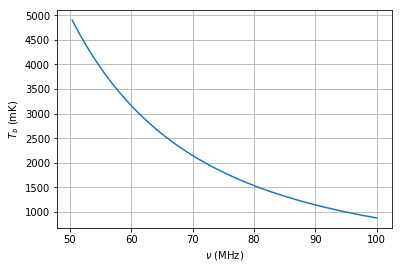

In [2]:
CONFIG='../config/analytic_test_blackhole_injection_overfit.yaml'
sampler=GSBH_MCMC.Sampler(CONFIG,fmin=50.,fmax=100)#initialize sampler
plt.plot(sampler.freqs,sampler.tb_meas)#plot simulated data 
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.grid()
sampler.sample()#perform sampling
samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
ml_samples=np.median(samples,axis=0)

In [3]:
print(ml_samples)

[ 7.26255270e+01  3.26345410e+00  9.51178701e-01  3.71083451e+01
  1.85732716e+03 -2.14800816e+02  3.28176309e+02 -2.36945915e+02
  6.16025016e+01]


Make a corner plot. 

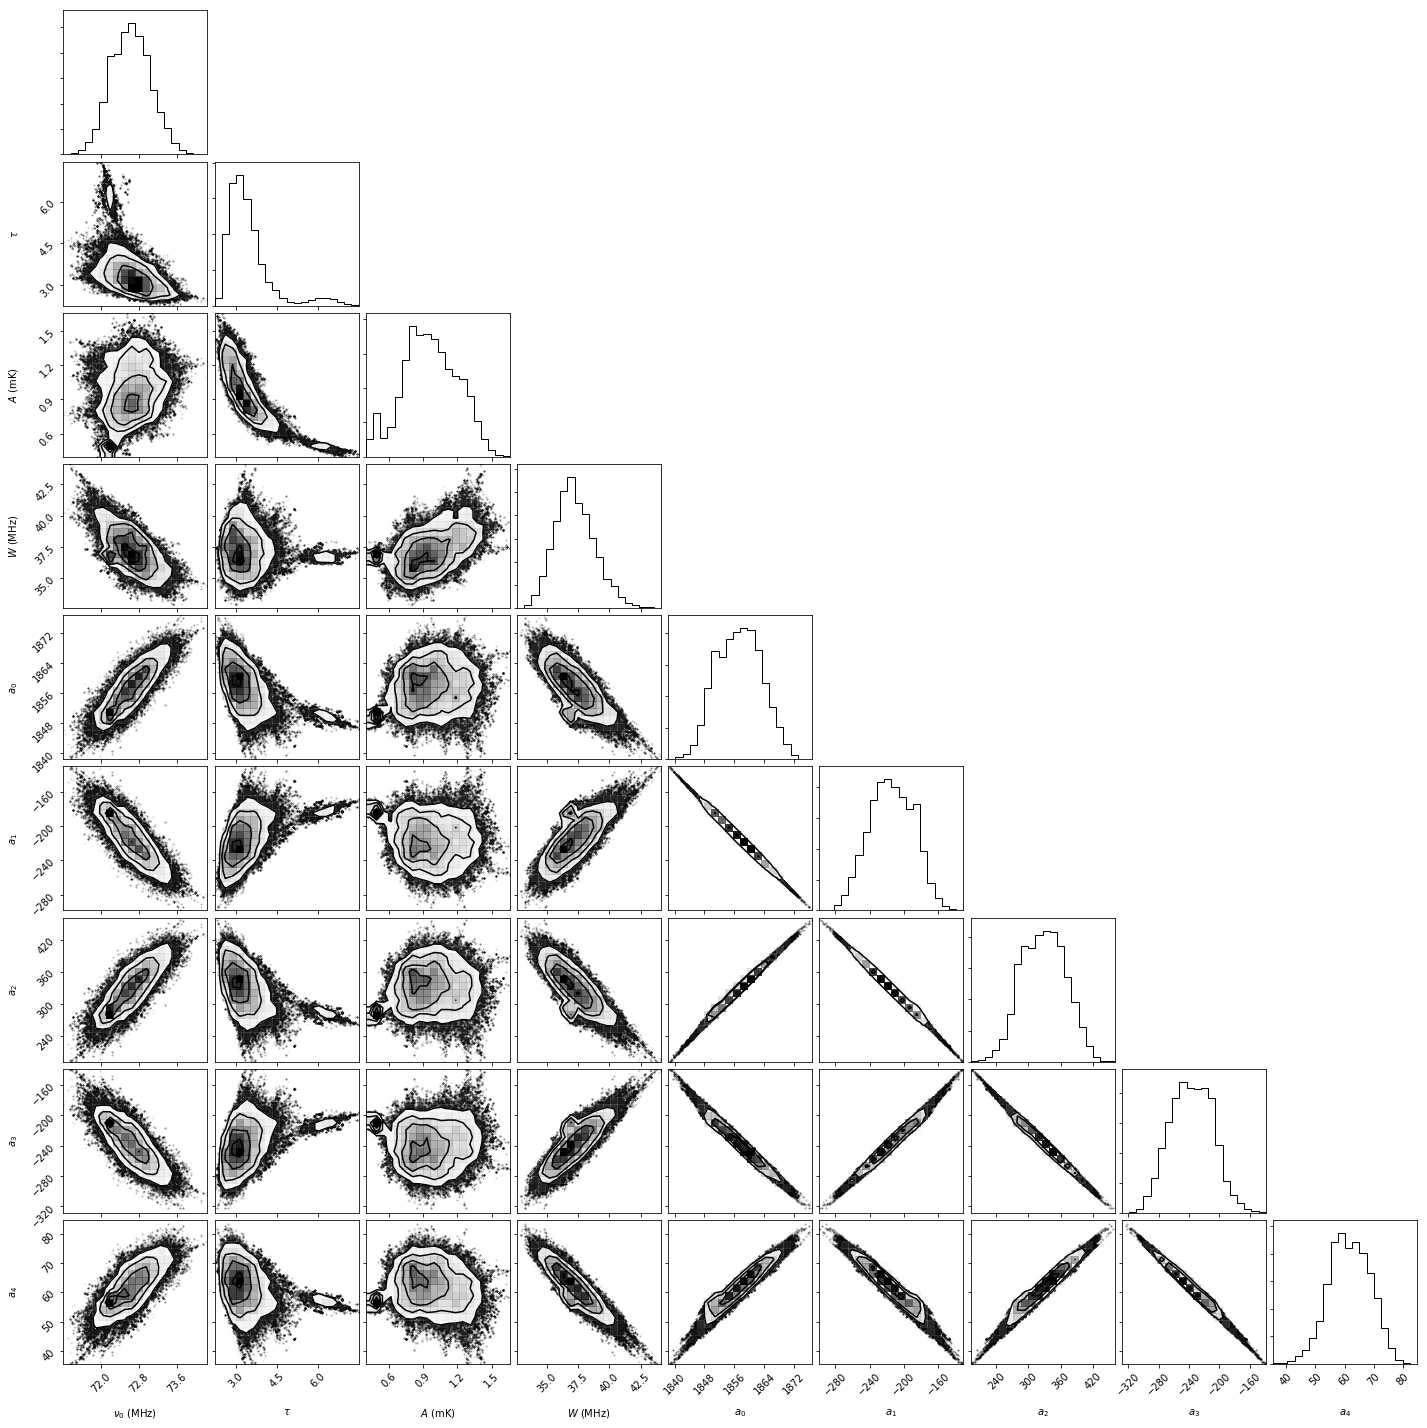

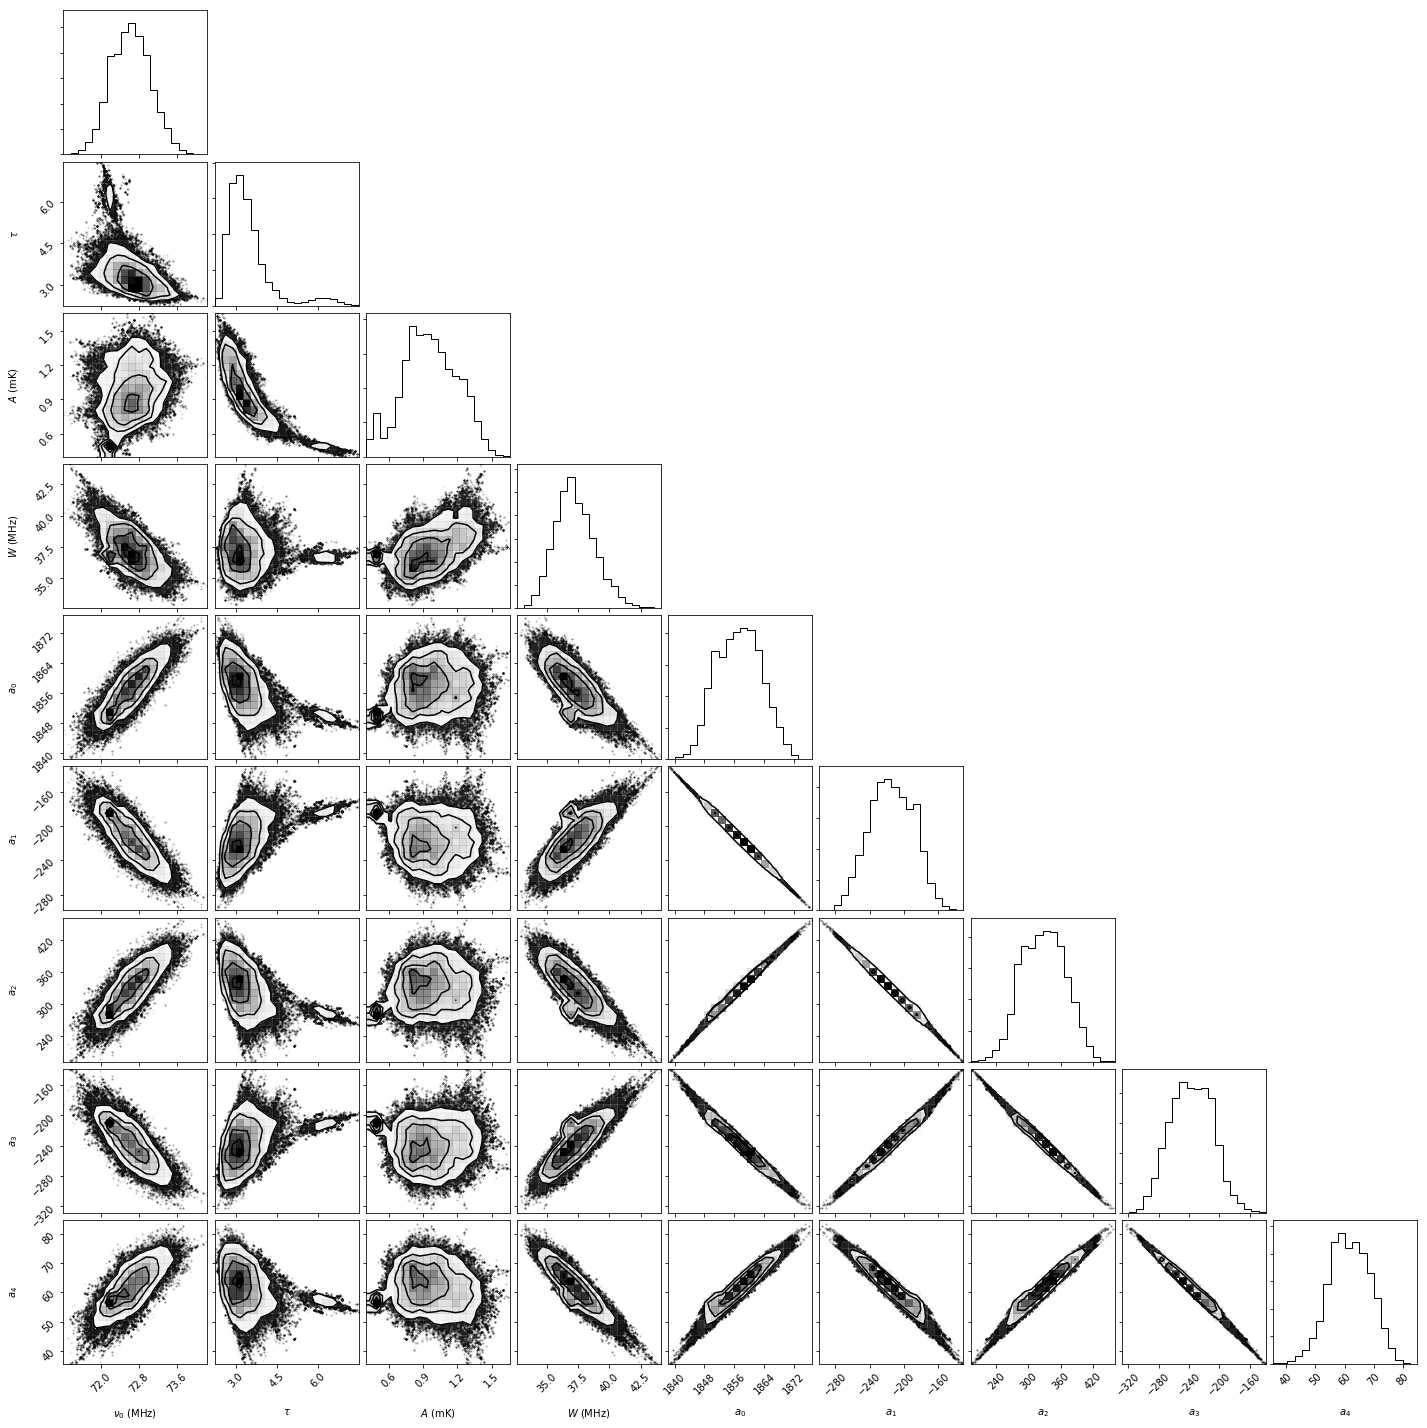

In [4]:
corner.corner(samples,
labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$','$a_1$','$a_2$','$a_3$','$a_4$'))

Plotting the fitted amplitude, we find that it is significantly deeper, flatter, and wider than our injected model. Bummer. I suspsect that the fe

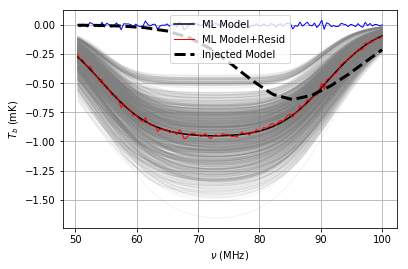

In [7]:
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,len(samples)-1)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
fgdict={}
for n in range(sampler.params_all['NPOLY']):
    key='APOLY%d'%n
    fgdict[key]=ml_samples[n+4] 
fgdict['NPOLY']=sampler.params_all['NPOLY']
l1=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict),color='k')[0]
l2=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict)+sampler.dtb,color='r',lw=1)[0]
l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
l4=plt.plot(sampler.freqs,sampler.data[:,-2],color='k',ls='--',lw=3)[0]
#plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2,l4),('ML Model','ML Model+Resid','Injected Model'))
plt.grid()